In [8]:
import numpy as np
import torch
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
from modules.modules import Net
net = Net()
chkpnt = torch.load(r'outputs/t2-label_smooth/chkpnt.pt', map_location=device)
net.load_state_dict(chkpnt['model_dict'], strict=True)
net.eval()
del chkpnt

# net2 = Net()
# chkpnt = torch.load(r'outputs/t2-ce/chkpnt.pt', map_location=device)
# net2.load_state_dict(chkpnt['model_dict'], strict=True)
# net2.eval()
# del chkpnt

INFO:weightwatcher:

python      version 3.8.13 (default, Apr 19 2022, 00:53:22) 
[GCC 7.5.0]
numpy       version 1.23.0
tensforflow version 2.9.1
keras       version 2.9.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'min_evals': 0, 'max_evals': None, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
Assuming nested distributions


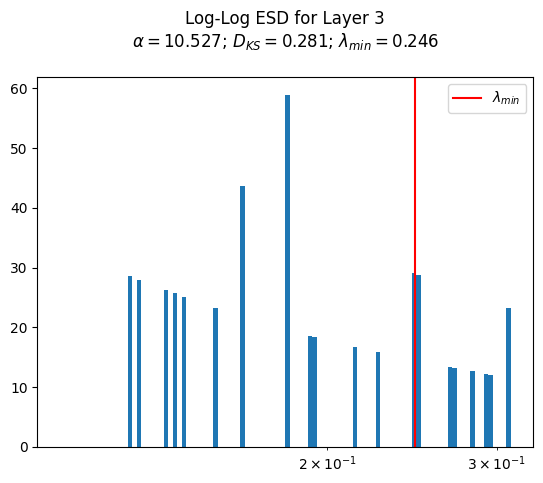

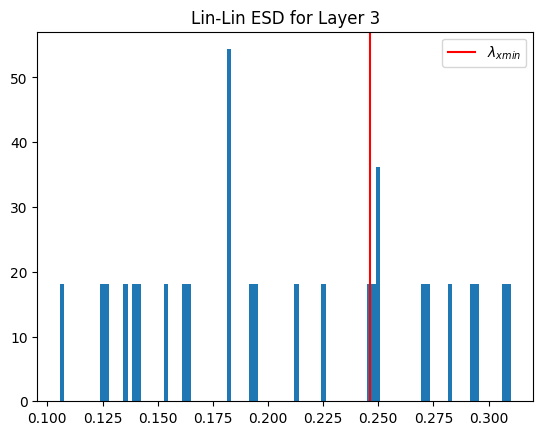

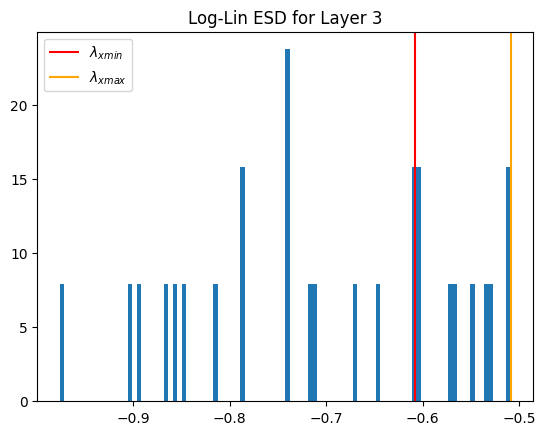

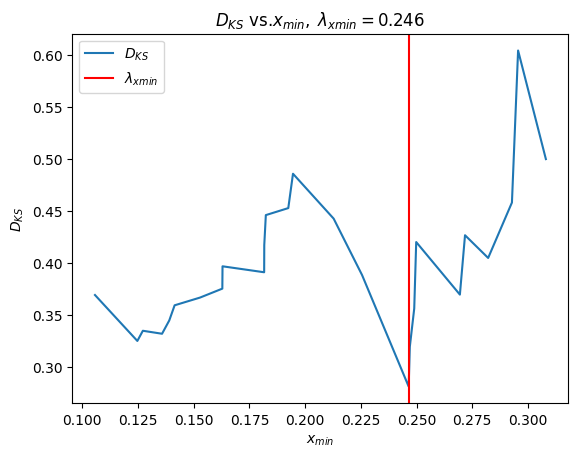

<Figure size 640x480 with 0 Axes>

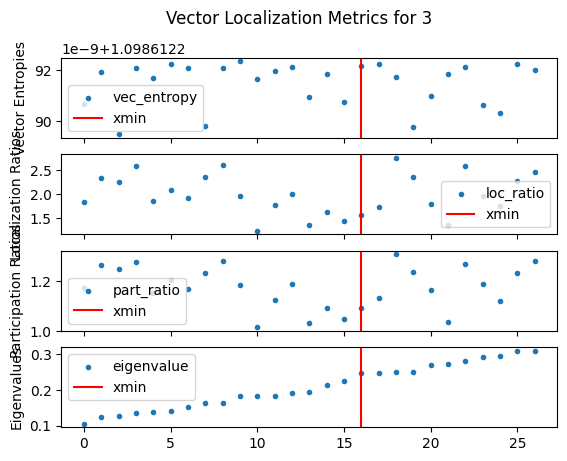

<Figure size 640x480 with 0 Axes>

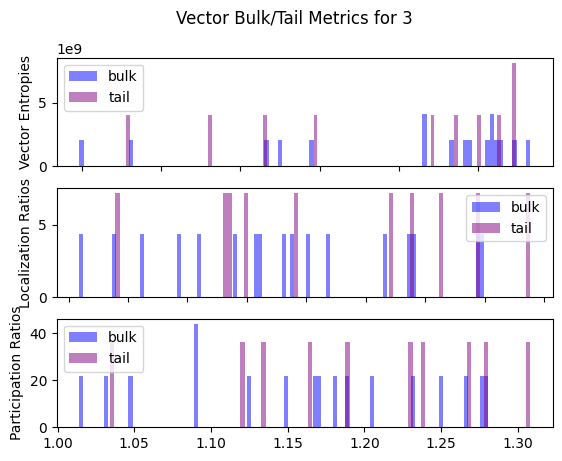

/media/avi/8E56B6E056B6C86B/cifar10/venv/lib/python3.8/site-packages/weightwatcher/weightwatcher.py:1667: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  details = details.append(ww_layer.get_row(), ignore_index=True)


Assuming nested distributions


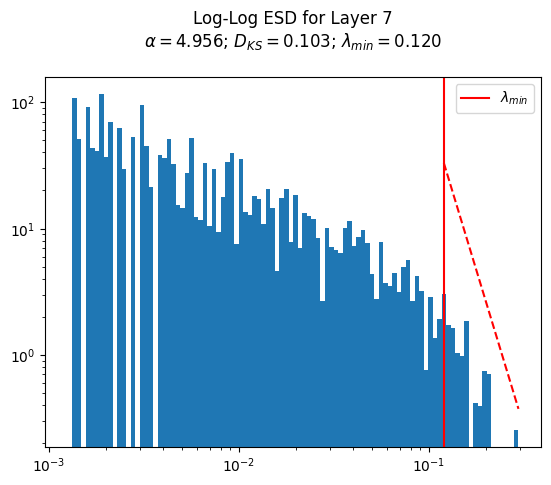

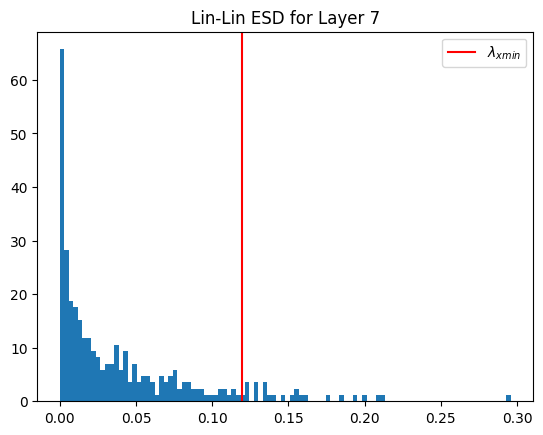

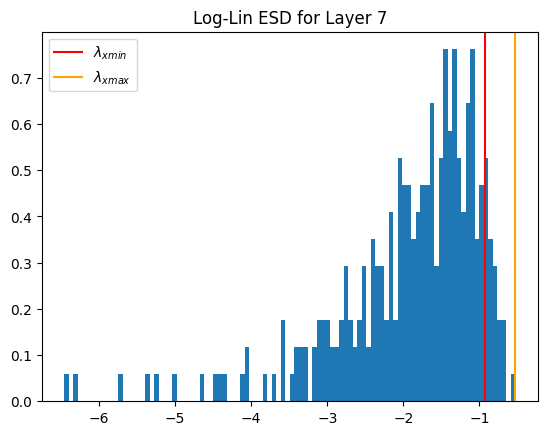

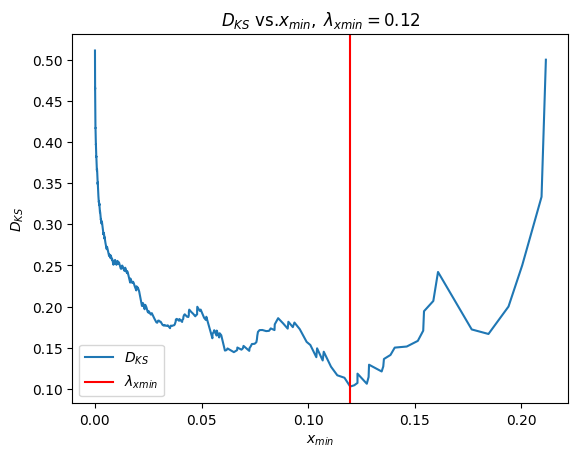

<Figure size 640x480 with 0 Axes>

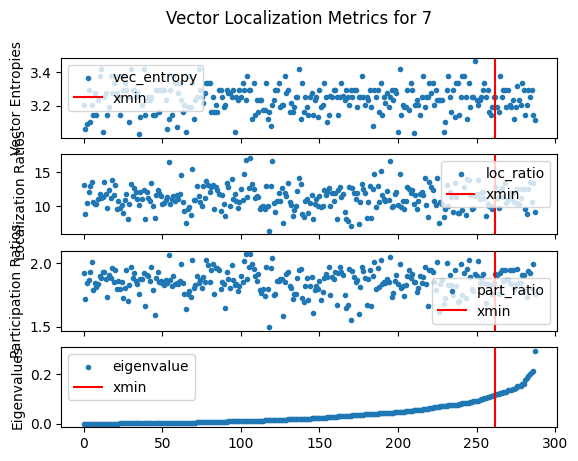

<Figure size 640x480 with 0 Axes>

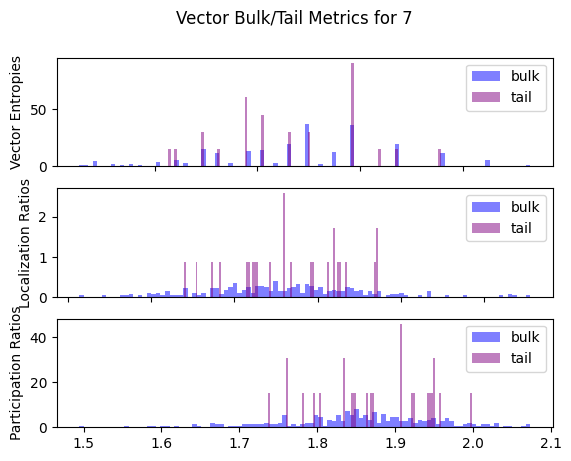

/media/avi/8E56B6E056B6C86B/cifar10/venv/lib/python3.8/site-packages/weightwatcher/weightwatcher.py:1667: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  details = details.append(ww_layer.get_row(), ignore_index=True)


Assuming nested distributions


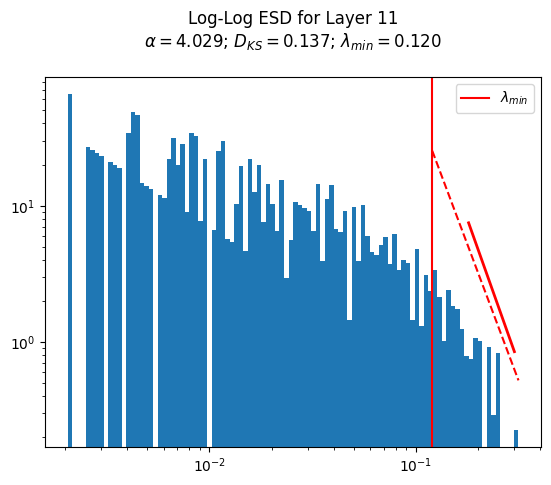

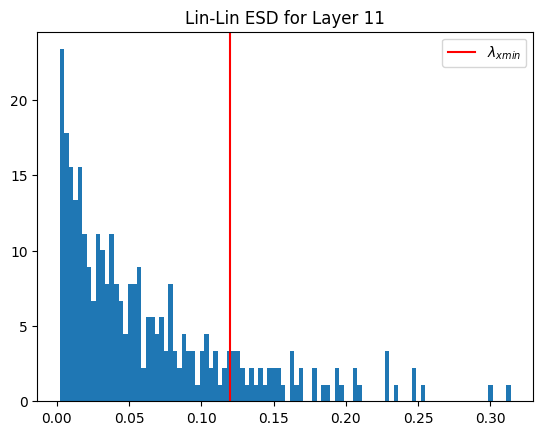

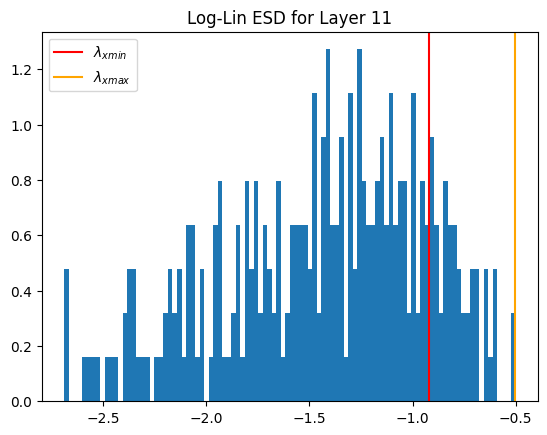

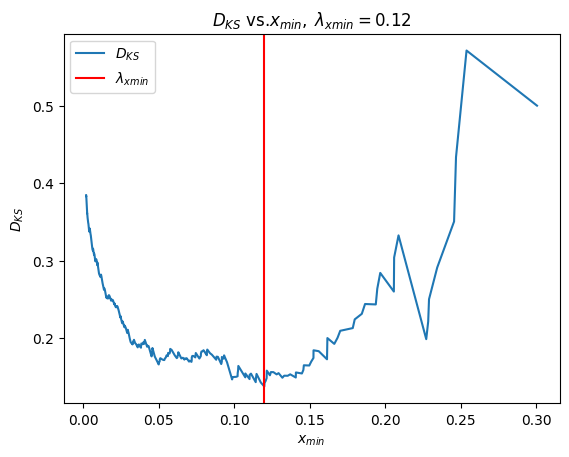

<Figure size 640x480 with 0 Axes>

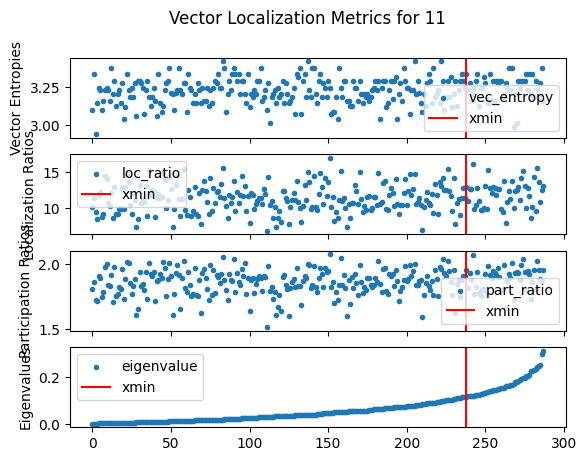

<Figure size 640x480 with 0 Axes>

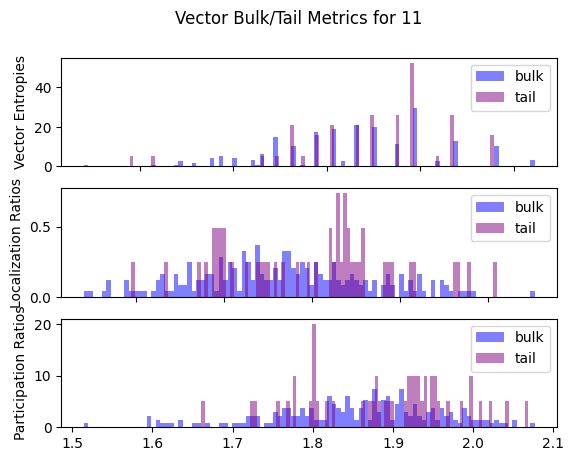

/media/avi/8E56B6E056B6C86B/cifar10/venv/lib/python3.8/site-packages/weightwatcher/weightwatcher.py:1667: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  details = details.append(ww_layer.get_row(), ignore_index=True)


Assuming nested distributions


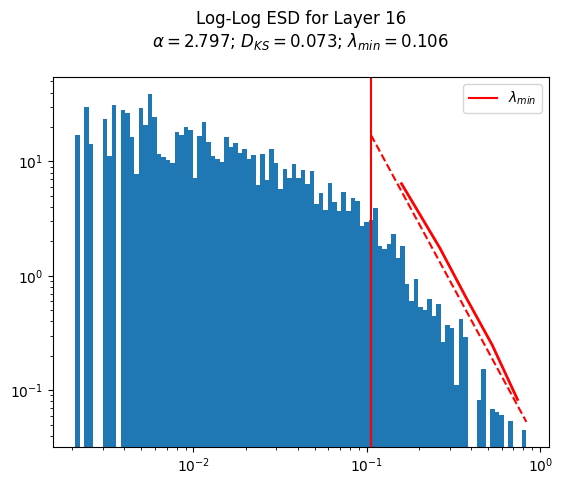

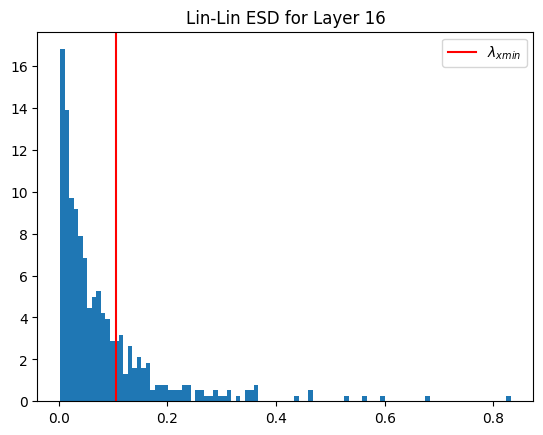

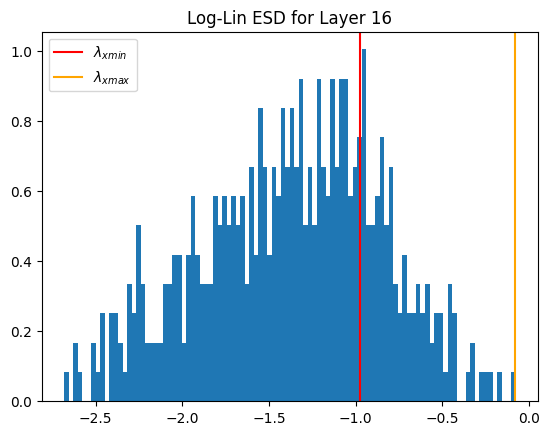

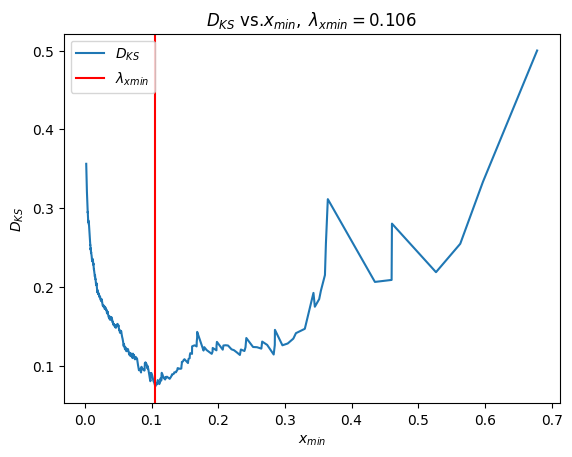

<Figure size 640x480 with 0 Axes>

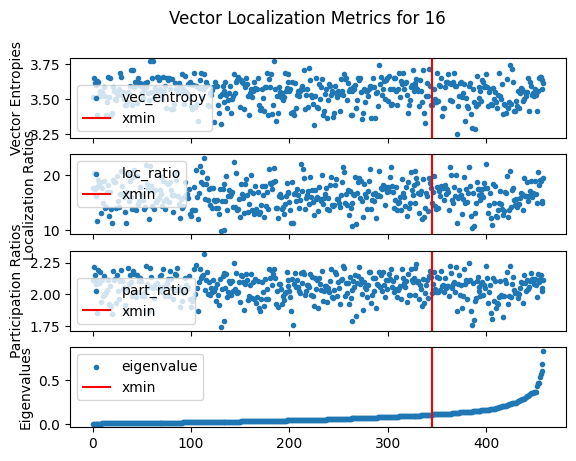

<Figure size 640x480 with 0 Axes>

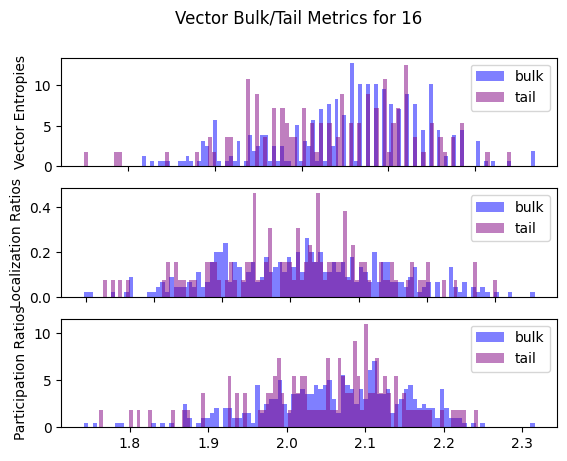

/media/avi/8E56B6E056B6C86B/cifar10/venv/lib/python3.8/site-packages/weightwatcher/weightwatcher.py:1667: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  details = details.append(ww_layer.get_row(), ignore_index=True)


Assuming nested distributions


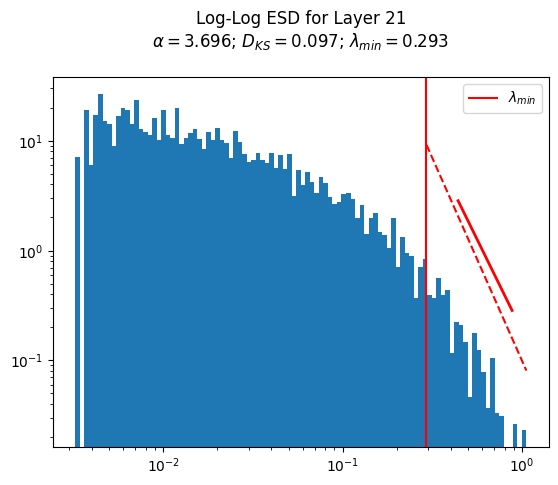

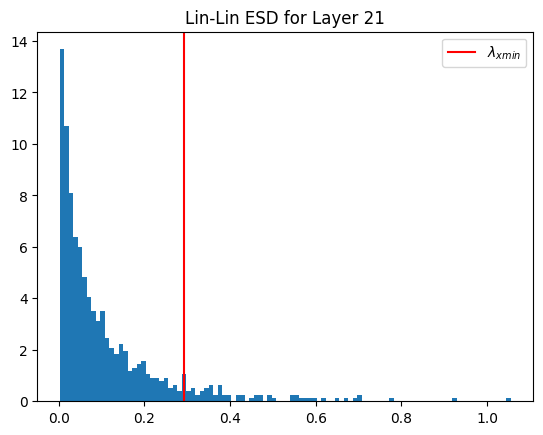

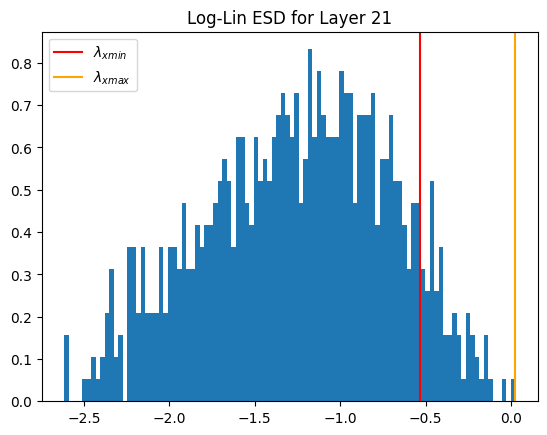

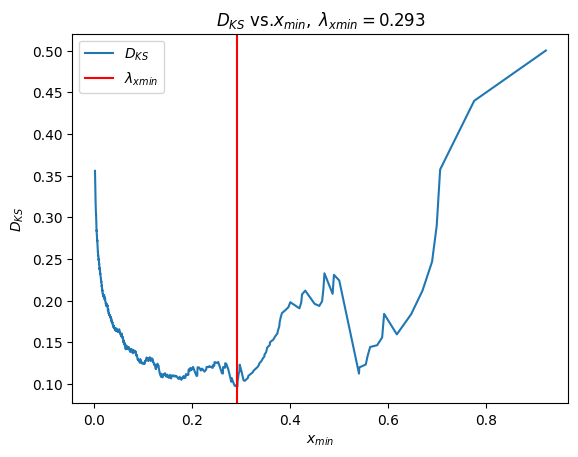

<Figure size 640x480 with 0 Axes>

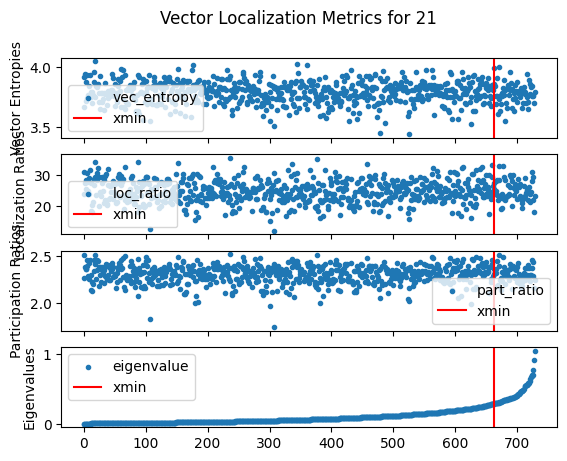

<Figure size 640x480 with 0 Axes>

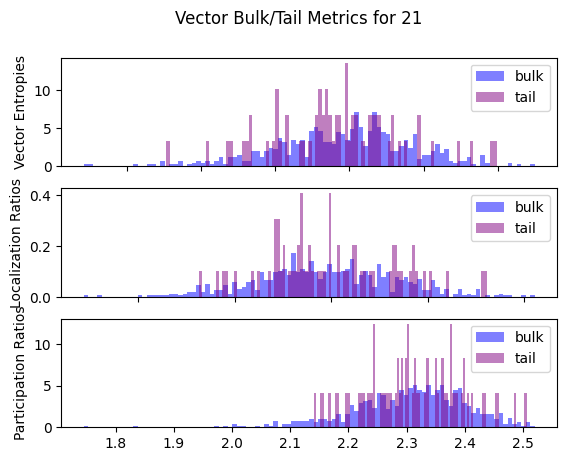

/media/avi/8E56B6E056B6C86B/cifar10/venv/lib/python3.8/site-packages/weightwatcher/weightwatcher.py:1667: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  details = details.append(ww_layer.get_row(), ignore_index=True)


Assuming nested distributions


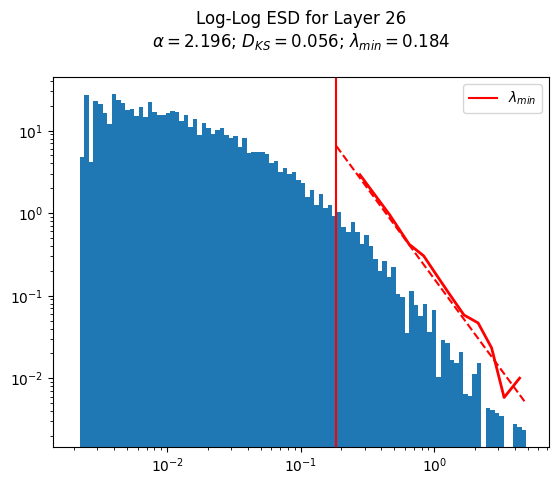

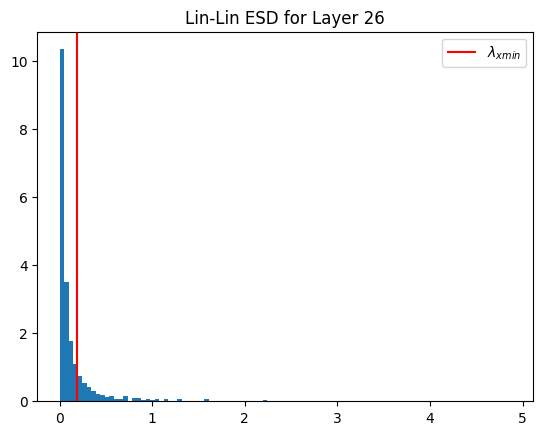

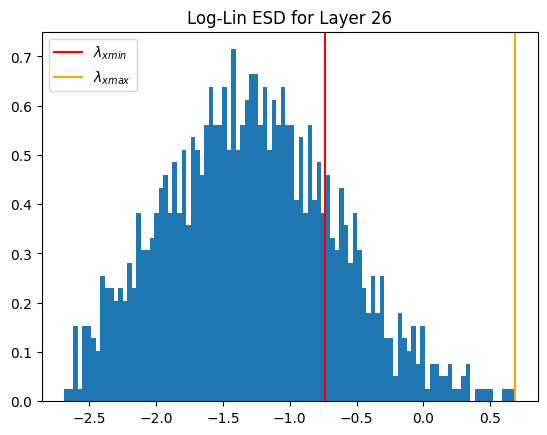

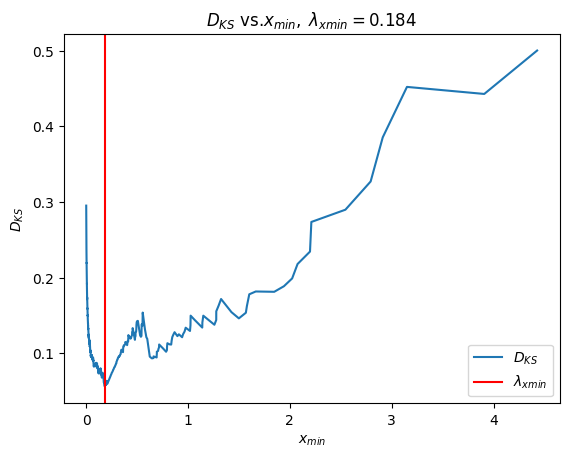

<Figure size 640x480 with 0 Axes>

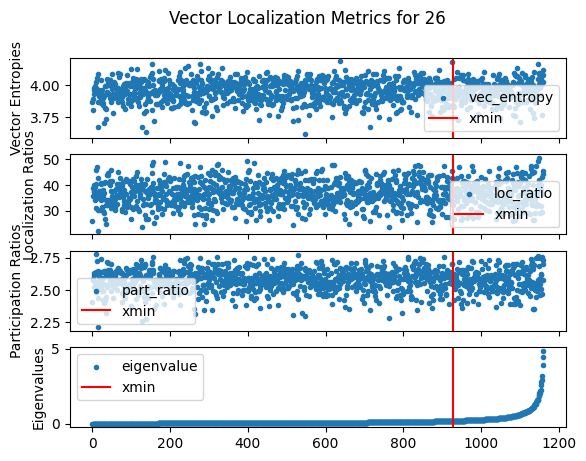

<Figure size 640x480 with 0 Axes>

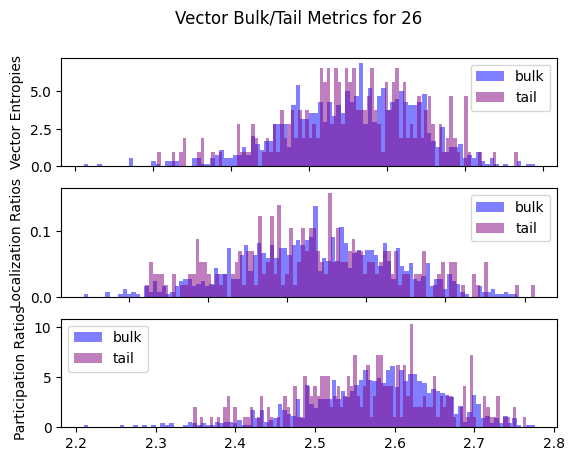

/media/avi/8E56B6E056B6C86B/cifar10/venv/lib/python3.8/site-packages/weightwatcher/weightwatcher.py:1667: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  details = details.append(ww_layer.get_row(), ignore_index=True)
Assuming nested distributions


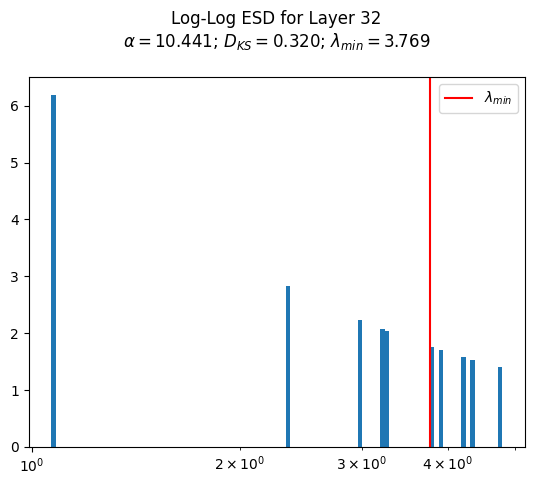

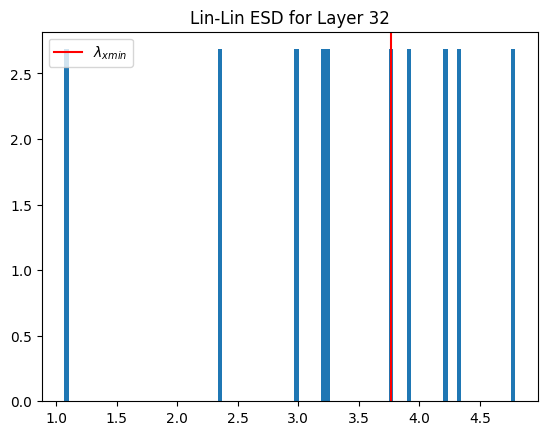

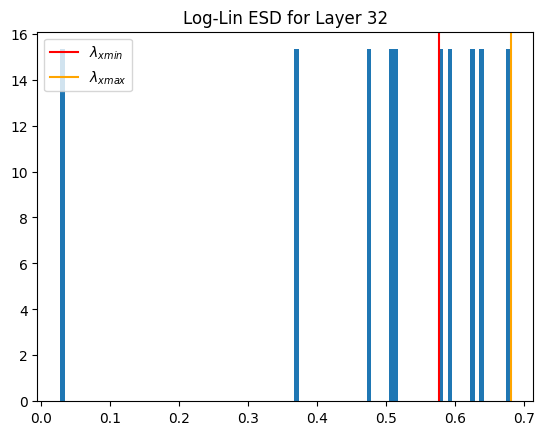

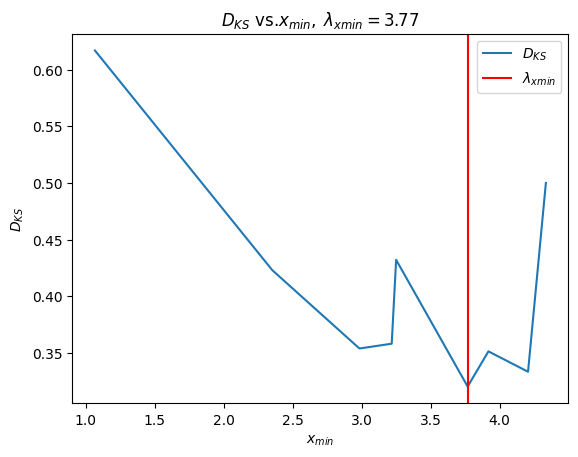

<Figure size 640x480 with 0 Axes>

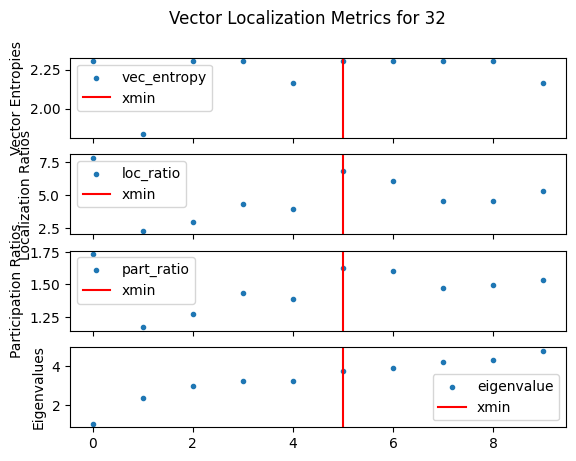

<Figure size 640x480 with 0 Axes>

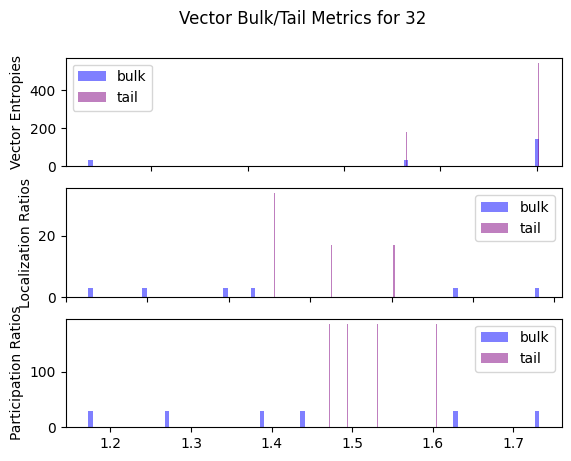

/media/avi/8E56B6E056B6C86B/cifar10/venv/lib/python3.8/site-packages/weightwatcher/weightwatcher.py:1667: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  details = details.append(ww_layer.get_row(), ignore_index=True)


<Figure size 640x480 with 0 Axes>

In [18]:
import weightwatcher as ww
watcher = ww.WeightWatcher(model=net)
details = watcher.analyze(plot=True)
net_ = Net()
details = watcher.distances(net_, net)

# model = models.vgg19_bn(pretrained=True)
# watcher = ww.WeightWatcher(model=model)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(202103014)

N = 5 # dimension of our square matrix

D = np.diag([0, 3 + 1j, 4 + 1j, 1 + 5j, 9 + 2j])
M = np.random.rand(N, N) + D

R = np.zeros(N) # disk radii
for i in range(N):
    R[i] = sum(abs(M[i,:])) - abs(M[i,i])

eigenvalues = np.linalg.eigvals(M)

# Plotting code
fig, ax = plt.subplots()
for k in range(N):
    x, y = M[k,k].real, M[k,k].imag
    ax.add_artist( plt.Circle((x, y), R[k], alpha=0.5) )
    plt.plot(eigenvalues[k].real, eigenvalues[k].imag, 'k+')

ax.axis([-4, 12.5, -4, 9])
ax.set_aspect(1)
ax.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Gershgorin disks and eigenvalues $x + iy$")

In [27]:
targets = torch.Tensor([2, 3, 4]).long()
print(targets)
n_classes = 10

t = torch.empty(size=(targets.size(0), n_classes)).fill_(0).scatter_(1, targets.data.unsqueeze(1), 1.)
w = torch.rand_like(t)
w = w / w.sum(-1).view(-1, 1)
t


tensor([2, 3, 4])


tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [29]:
print(t.shape, targets.shape)
t = (1-w)*(t==1) + w * (t!=1)
t.sum(-1)

torch.Size([3, 10]) torch.Size([3])


tensor([1.0000, 1.0000, 1.0000])